# Задание 1

Возьмем стандартный датасет из `seaborn` - `taxis`. Необходимо выполнить одну визуализацию, но двумя разными библиотеками на ваш выбор.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from random import sample, choice
k34401 = pd.DataFrame(list(sample(range(1,16), 15)), columns=["K34401"]).T
k34421 = pd.DataFrame(list(sample(range(1,16), 8)), columns=["K34421"]).T

k34401.columns = list(range(1,16))
k34401[16] = [6]
k34421.columns = list(range(1,9))
display(k34421.iloc[:,:9])
display(k34401.iloc[:,:17])

,1,2,3,4,5,6,7,8
K34421,7,1,14,6,3,12,4,5


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
K34401,3,4,6,13,5,11,9,7,12,15,2,14,10,1,8,6


In [ ]:
df = sns.load_dataset("taxis")
display(df.head(2))
df.shape

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan


(6433, 14)

Датасет содержит данные о поездках на такси в Нью-Йорке за 2019 год. Столбцы следующие (возможны опечатки, будьте внимательны):
* `pickup` – время начала поездки
* `dropoff` – время окончания поездки
* `passengers` – количество пассажиров
* `distance` – расстояние поездки
* `fare` – стоимость поездки
* `tip` – чаевые
* `tolls` – штраф
* `total` – общая стоимость поездки
* `color` – цвет такси
* `payment` – способ оплаты
* `pickup_zone` – район начала поездки
* `dropoff_zone` – район окончания поездки
* `pickup_borough` – боро начала поездки
* `dropoff_borough` – боро окончания поездки

Подробнее про данные: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

# **Задание 9**

**Покажите топ-5 самых популярных маршрутов. Маршрутом считаем поездку из района в район. Направление маршрута не учитывыаем.**

Создаем столбец с маршрутом поездки - комбинация двух столбцов (pickup_zone и dropoff_zone). Район начала и конца поездки располагаем по возрастанию, чтобы не учитывать направление маршрута.

In [ ]:
df['route'] = np.where(df['pickup_zone'] < df['dropoff_zone'], df['pickup_zone'] + ' - ' + df['dropoff_zone'], df['dropoff_zone'] + ' - ' + df['pickup_zone'])

С помощью groupby находим самые популяерные маршруты. На пятое место претендует два маршрута с одинаковым числом поездок, поэтому визуализируем их оба.

In [ ]:
cnt = df.groupby(['route']).size().reset_index().rename(columns={0: 'count'}).sort_values(['count'], ascending = False).head(6)
cnt

,route,count
2020,Upper East Side North - Upper East Side South,53
2019,Upper East Side North - Upper East Side North,38
745,East Harlem North - East Harlem South,31
303,Central Harlem - Central Harlem North,30
1548,Lincoln Square East - Upper West Side South,29
1833,Murray Hill - Union Sq,29


In [ ]:
routes = list(cnt['route'])
df['route'] = pd.Categorical(df['route'], routes)

Визуализация с помощью seaborn.

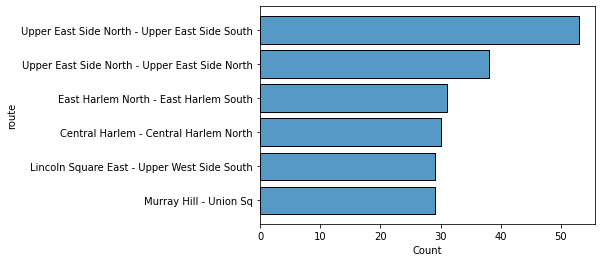

In [ ]:
sns.histplot(data=df[df['route'].isin(routes)], y='route', shrink=.8)

Визуализация с помощью matplotlib

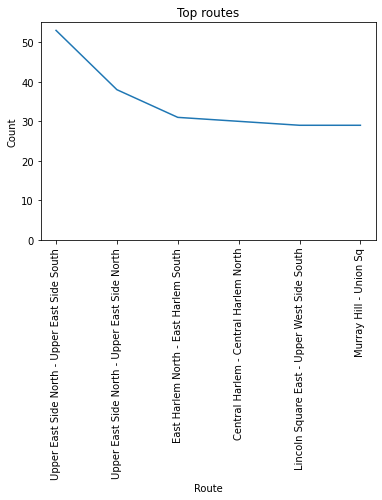

In [ ]:
plt.plot(cnt['route'], cnt['count'])

plt.title("Top routes")

plt.ylim(0, 55)

plt.xlabel("Route")
plt.ylabel("Count")

plt.xticks(rotation=90)

plt.show()